# Import the data from Database

In [2]:
import sqlite3
import pandas as pd

# Path to your SQLite database
db_path = "../data/data.db"

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# List all tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(tables)


taxi_data = pd.read_sql_query("SELECT * FROM taxi_data;", conn)

weather_data = pd.read_sql_query("SELECT * FROM weather_data;", conn)


# Close the connection
conn.close()


Tables in the database:
                name
0  taxi_data_grouped
1          taxi_data
2       weather_data


# Filter data only 2019 year

In [3]:
# Filter data for 2019 only
taxi_data['date'] = pd.to_datetime(taxi_data['date'])  # Ensure 'date' column is a datetime object
taxi_data_2019 = taxi_data[(taxi_data['date'] >= '2019-01-01') & (taxi_data['date'] <= '2019-12-31')]

# Print the filtered data
print(taxi_data_2019)


          date  total_passenger_count  total_trip  average_trip_time
16  2019-01-01               319678.0      189035          17.744783
17  2019-01-02               317395.0      197852          16.464732
18  2019-01-03               350961.0      222879          16.994892
19  2019-01-04               373023.0      235053          16.327286
20  2019-01-05               390129.0      236041          15.886989
..         ...                    ...         ...                ...
376 2019-12-27               275274.0      169618         142.227909
377 2019-12-28               287524.0      172030          61.385877
378 2019-12-29               271725.0      165128          87.466745
379 2019-12-30               274619.0      174564          13.312250
380 2019-12-31               268352.0      169197         121.596891

[365 rows x 4 columns]


# Merge both dataset (taxi dataset and weather dataset)

In [4]:
# Rename 'datetime' column to 'date' in final_weather_data
final_weather_data = weather_data.rename(columns={'datetime': 'date'})

# Ensure both DataFrames have the same type for the 'date' column
final_weather_data['date'] = pd.to_datetime(final_weather_data['date']).dt.date  # Convert 'date' to datetime.date format
taxi_data_2019['date'] = pd.to_datetime(taxi_data_2019['date']).dt.date  # Convert 'date' to datetime.date format

# Alternatively, using .loc to avoid SettingWithCopyWarning explicitly:
final_weather_data.loc[:, 'date'] = pd.to_datetime(final_weather_data['date']).dt.date
taxi_data_2019.loc[:, 'date'] = pd.to_datetime(taxi_data_2019['date']).dt.date

# Select only the required columns from taxi_data_2019
taxi_columns = ['date', 'total_passenger_count', 'total_trip', 'average_trip_time']
taxi_data_2019 = taxi_data_2019.loc[:, taxi_columns]  # Use .loc for explicit selection

# Select only the required columns from final_weather_data
weather_columns = ['date', 'tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'visibility']
final_weather_data = final_weather_data.loc[:, weather_columns]  # Use .loc for explicit selection

# Merge the DataFrames on the 'date' column
df = pd.merge(taxi_data_2019, final_weather_data, on='date', how='inner')

# Print the final merged DataFrame
print("Merged DataFrame:")
print(df.head())


Merged DataFrame:
         date  total_passenger_count  total_trip  average_trip_time  tempmax  \
0  2019-01-01               319678.0      189035          17.744783     14.6   
1  2019-01-02               317395.0      197852          16.464732      4.5   
2  2019-01-03               350961.0      222879          16.994892      6.7   
3  2019-01-04               373023.0      235053          16.327286      8.0   
4  2019-01-05               390129.0      236041          15.886989      8.1   

   tempmin  temp  humidity  windspeed  visibility  
0      5.2  10.2      70.2       39.9        13.6  
1      1.7   3.0      55.4       21.6        16.0  
2      3.3   5.1      63.8       33.2        15.9  
3      1.8   4.9      62.3       26.2        15.9  
4      6.0   6.7      89.2       28.8         8.9  


C:\Users\mulan\AppData\Local\Temp\ipykernel_20368\1298138839.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data_2019['date'] = pd.to_datetime(taxi_data_2019['date']).dt.date  # Convert 'date' to datetime.date format


# Dataset Overview

In [5]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   365 non-null    object 
 1   total_passenger_count  365 non-null    float64
 2   total_trip             365 non-null    int64  
 3   average_trip_time      365 non-null    float64
 4   tempmax                365 non-null    float64
 5   tempmin                365 non-null    float64
 6   temp                   365 non-null    float64
 7   humidity               365 non-null    float64
 8   windspeed              365 non-null    float64
 9   visibility             365 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 28.6+ KB
None


In [6]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       total_passenger_count     total_trip  average_trip_time     tempmax  \
count             365.000000     365.000000         365.000000  365.000000   
mean           360279.517808  231226.238356          54.432885   16.777534   
std             50254.211841   33968.590548          64.923725   10.140797   
min            167781.000000  101917.000000           7.679438   -9.700000   
25%            328240.000000  211219.000000          16.917281    7.900000   
50%            363733.000000  236041.000000          19.301854   17.500000   
75%            395548.000000  256629.000000          71.824442   25.500000   
max            461982.000000  298099.000000         500.131529   35.700000   

          tempmin        temp    humidity   windspeed  visibility  
count  365.000000  365.000000  365.000000  365.000000  365.000000  
mean     9.743562   13.174247   61.721918   22.526027   14.674795  
std      9.461036    9.613789   14.962308    8.219830    2.299706  
min 

# Correlation Heatmap

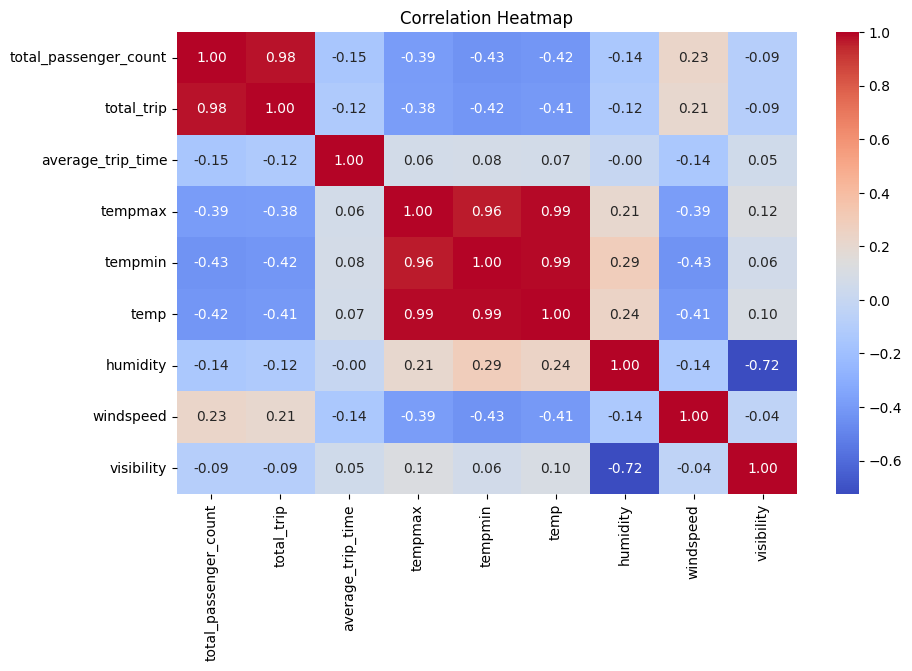

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the 'date' column from correlation calculation
numeric_df = df.select_dtypes(include='number')

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Weekday vs. Weekend Analysis

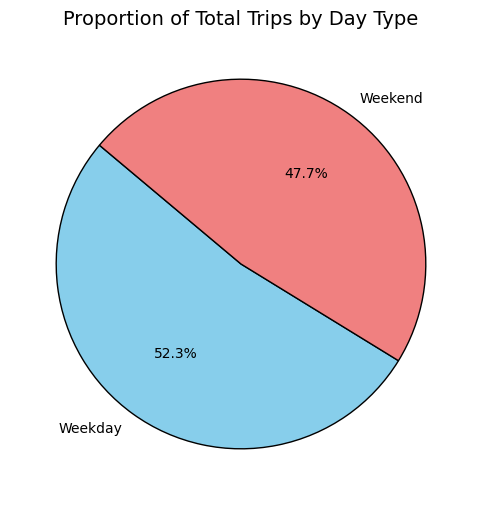

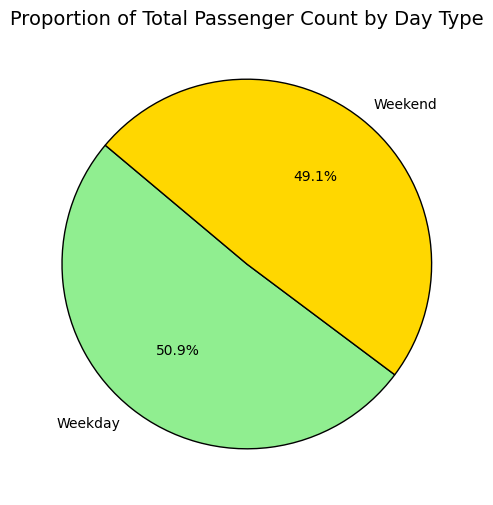

In [51]:
import matplotlib.pyplot as plt

# Add a 'day_type' column
df['weekday'] = df['date'].dt.dayofweek
df['day_type'] = df['weekday'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Group by day type
day_type_data = df.groupby('day_type')[['total_trip', 'total_passenger_count']].mean()

# Plot pie chart for total trips
plt.figure(figsize=(8, 6))
plt.pie(
    day_type_data['total_trip'],
    labels=day_type_data.index,
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral'],
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Proportion of Total Trips by Day Type', fontsize=14)
plt.show()

# Plot pie chart for total passenger count
plt.figure(figsize=(8, 6))
plt.pie(
    day_type_data['total_passenger_count'],
    labels=day_type_data.index,
    autopct='%1.1f%%',
    colors=['lightgreen', 'gold'],
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Proportion of Total Passenger Count by Day Type', fontsize=14)
plt.show()


# Time-Series Trends

### Total Passenger Count Over Time

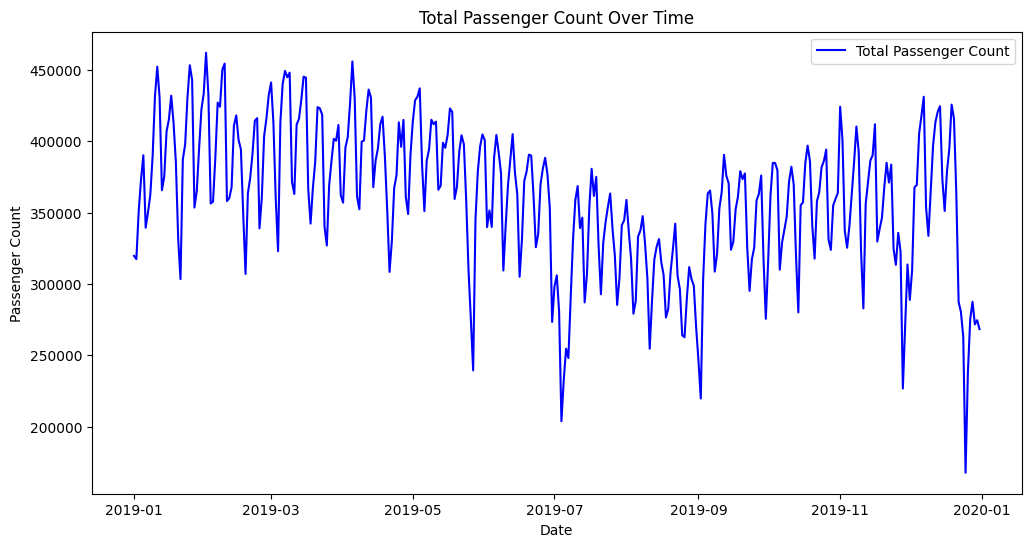

In [30]:
# Plot total passenger count over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['total_passenger_count'], label='Total Passenger Count', color='blue')
plt.title("Total Passenger Count Over Time")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.show()


### Total Trips Over Time

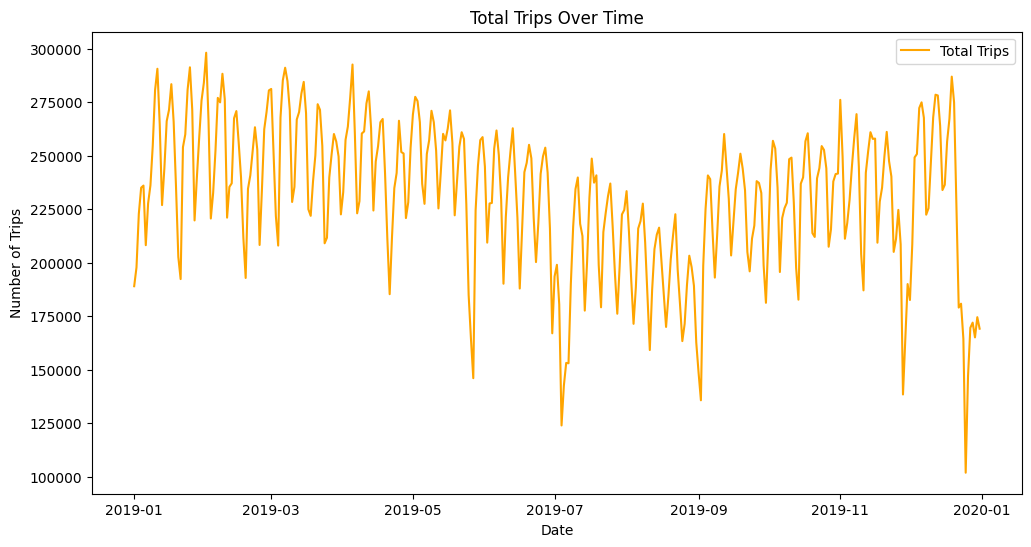

In [31]:
# Plot total trips over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['total_trip'], label='Total Trips', color='orange')
plt.title("Total Trips Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.legend()
plt.show()


#  Impact of Weather 

### Total Passenger Count vs. Temperature

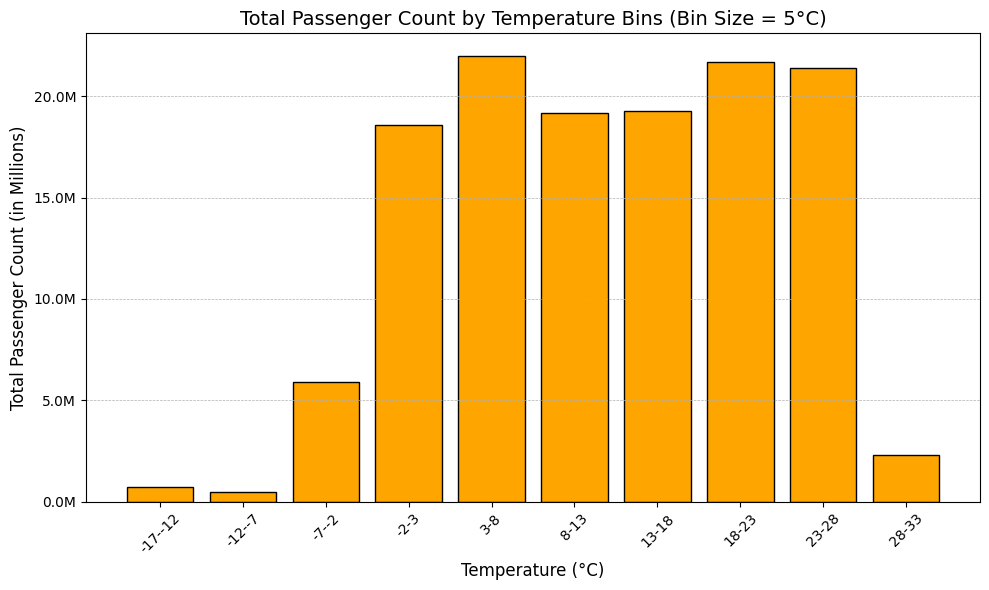

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define a function to format y-axis values in millions
def format_m(value, tick_number):
    return f'{value:.1f}M'

# Define temperature bins with a size of 5
bins = range(int(df['temp'].min()) - 5, int(df['temp'].max()) + 6, 5)  # Bin size = 5
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]

# Assign temperature bins to the DataFrame
df['temperature_bin'] = pd.cut(df['temp'], bins=bins, labels=labels, include_lowest=True)

# Group data by temperature bins and calculate total passenger count
binned_temp_data = df.groupby('temperature_bin', observed=True)['total_passenger_count'].sum().reset_index()

# Convert passenger count to millions
binned_temp_data['total_passenger_count'] /= 1e6

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(
    binned_temp_data['temperature_bin'], 
    binned_temp_data['total_passenger_count'], 
    color='orange', 
    edgecolor='black'
)
plt.title('Total Passenger Count by Temperature Bins (Bin Size = 5°C)', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Total Passenger Count (in Millions)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Apply custom formatter to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_m))

plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Total Passenger Count vs. Windspeed


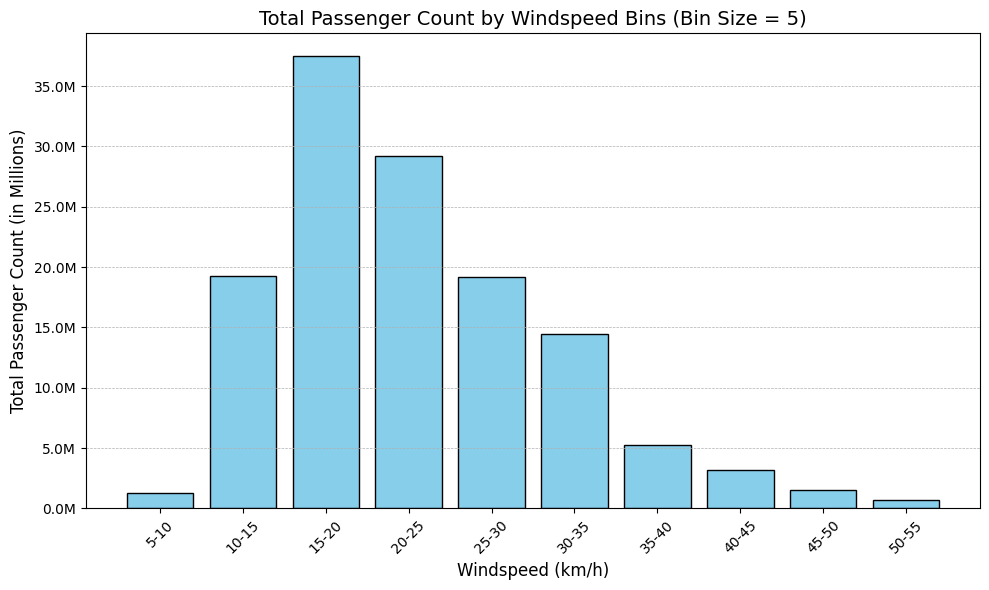

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define a function to format y-axis values in millions
def format_m(value, tick_number):
    return f'{value:.1f}M'

# Define wind speed bins with a size of 5
bins = range(0, int(df['windspeed'].max()) + 6, 5)  # Bin size = 5
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]

# Assign wind speed bins to the DataFrame
df['windspeed_bin'] = pd.cut(df['windspeed'], bins=bins, labels=labels, include_lowest=True)

# Group data by windspeed bins and calculate total passenger count
binned_windspeed_data = df.groupby('windspeed_bin', observed=True)['total_passenger_count'].sum().reset_index()

# Convert passenger count to millions
binned_windspeed_data['total_passenger_count'] /= 1e6

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(
    binned_windspeed_data['windspeed_bin'], 
    binned_windspeed_data['total_passenger_count'], 
    color='skyblue', 
    edgecolor='black'
)
plt.title('Total Passenger Count by Windspeed Bins (Bin Size = 5)', fontsize=14)
plt.xlabel('Windspeed (km/h)', fontsize=12)
plt.ylabel('Total Passenger Count (in Millions)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Apply custom formatter to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_m))

plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Monthly Trends: Total Passenger Count and Average Temperature

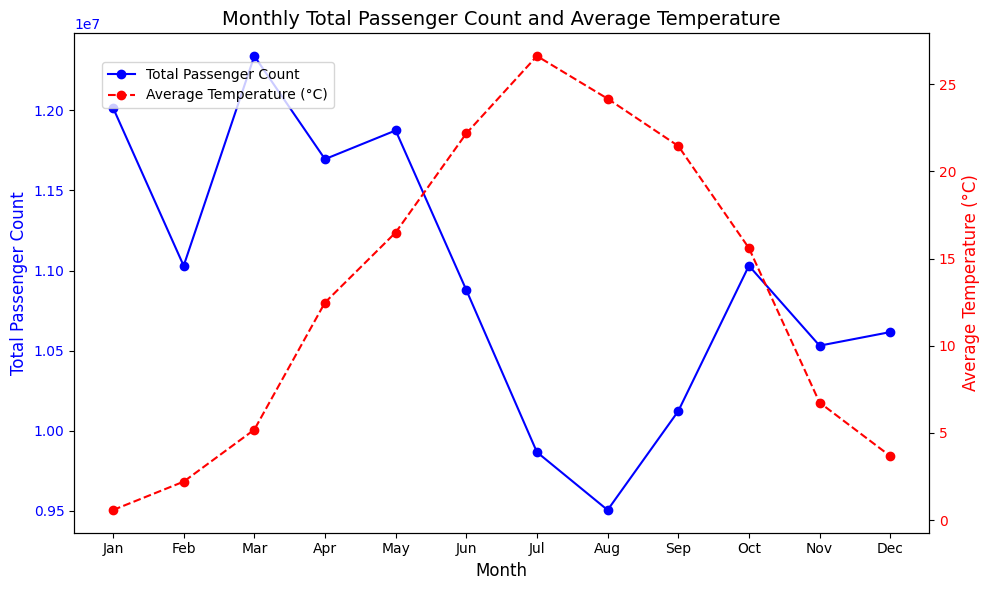

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the date
df['month'] = df['date'].dt.month

# Group data by month and calculate the sum of total passengers and mean temperature
monthly_data = df.groupby('month').agg(
    total_passenger_count=('total_passenger_count', 'sum'),
    avg_temperature=('temp', 'mean')
).reset_index()

# Plot the line chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Total Passenger Count on the primary y-axis
ax1.plot(
    monthly_data['month'],
    monthly_data['total_passenger_count'],
    color='blue',
    marker='o',
    label='Total Passenger Count'
)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Total Passenger Count', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Create a secondary y-axis for average temperature
ax2 = ax1.twinx()
ax2.plot(
    monthly_data['month'],
    monthly_data['avg_temperature'],
    color='red',
    marker='o',
    linestyle='--',
    label='Average Temperature (°C)'
)
ax2.set_ylabel('Average Temperature (°C)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legends
plt.title('Monthly Total Passenger Count and Average Temperature', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()



### Date-wise Total Passenger Count and Temperature Trends


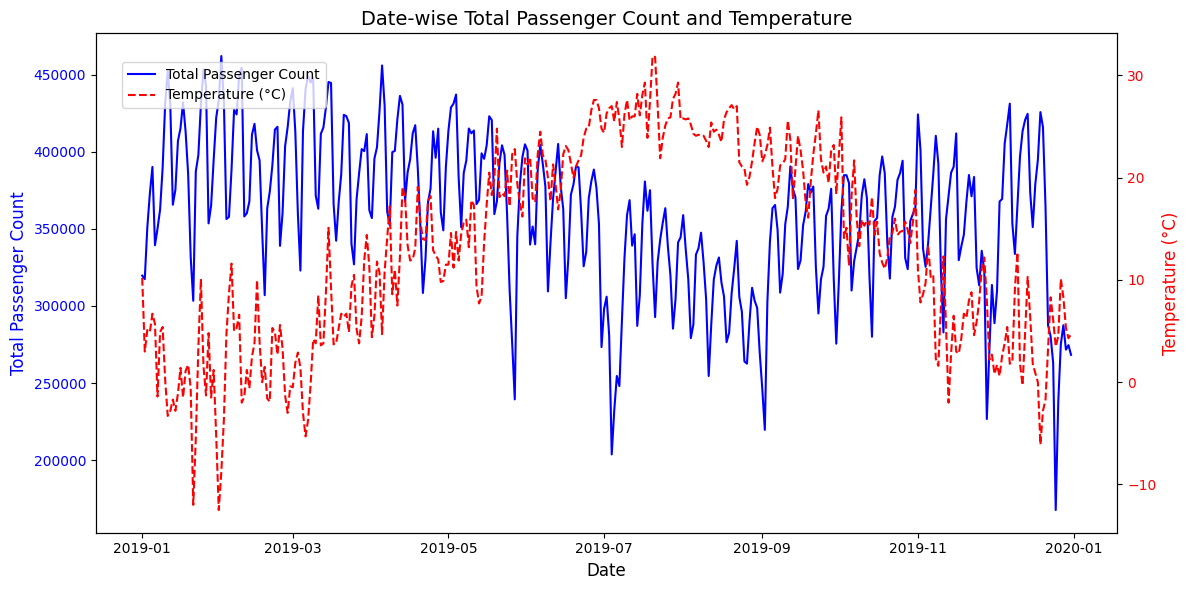

In [15]:
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Plot the line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Passenger Count on the primary y-axis
ax1.plot(
    df['date'],
    df['total_passenger_count'],
    color='blue',
    label='Total Passenger Count'
)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Passenger Count', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(
    df['date'],
    df['temp'],
    color='red',
    linestyle='--',
    label='Temperature (°C)'
)
ax2.set_ylabel('Temperature (°C)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legend
plt.title('Date-wise Total Passenger Count and Temperature', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()



### Date-wise Total Trip Count and Temperature Trends

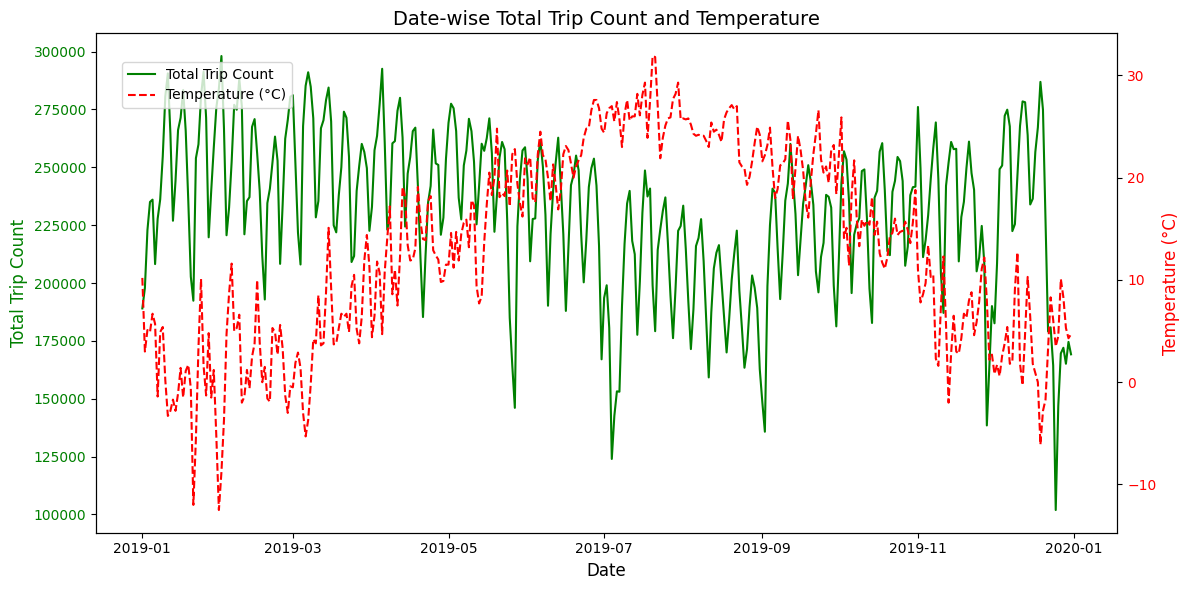

In [16]:
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Plot the line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Trip Count on the primary y-axis
ax1.plot(
    df['date'],
    df['total_trip'],
    color='green',
    label='Total Trip Count'
)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Trip Count', fontsize=12, color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a secondary y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(
    df['date'],
    df['temp'],
    color='red',
    linestyle='--',
    label='Temperature (°C)'
)
ax2.set_ylabel('Temperature (°C)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legend
plt.title('Date-wise Total Trip Count and Temperature', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


### Monthly Sum of Passenger Count


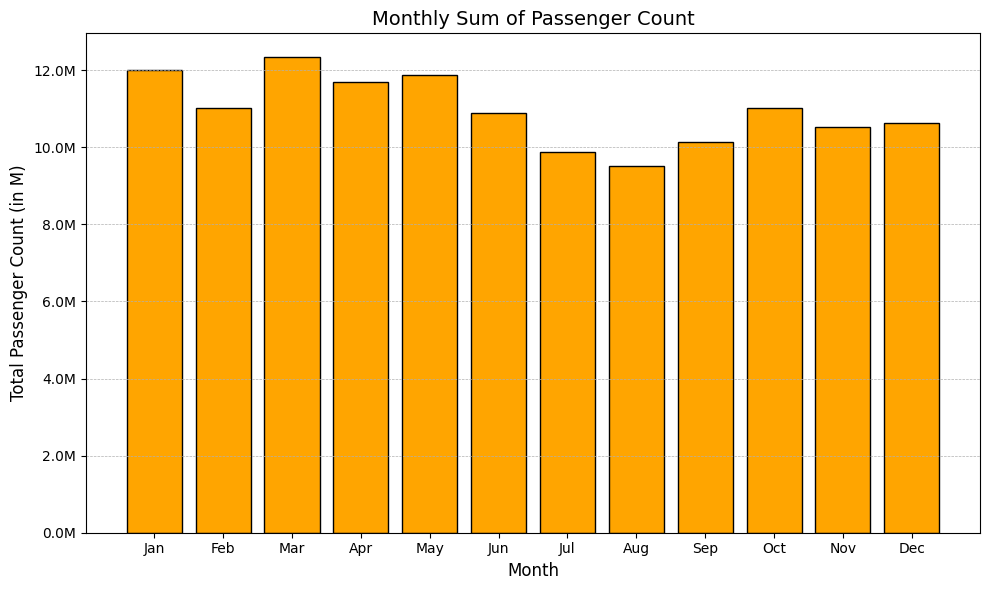

In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month and group data by month
df['month'] = df['date'].dt.month
monthly_passenger_data = df.groupby('month')['total_passenger_count'].sum().reset_index()

# Function to format y-axis ticks in 'M'
def format_m(value, tick_number):
    return f"{value / 1_000_000:.1f}M"

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_passenger_data['month'], monthly_passenger_data['total_passenger_count'], color='orange', edgecolor='black')
plt.title('Monthly Sum of Passenger Count', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Passenger Count (in M)', fontsize=12)
plt.xticks(monthly_passenger_data['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Apply the custom formatter to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_m))

plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Monthly Total Trip Count & Average Trip Duration

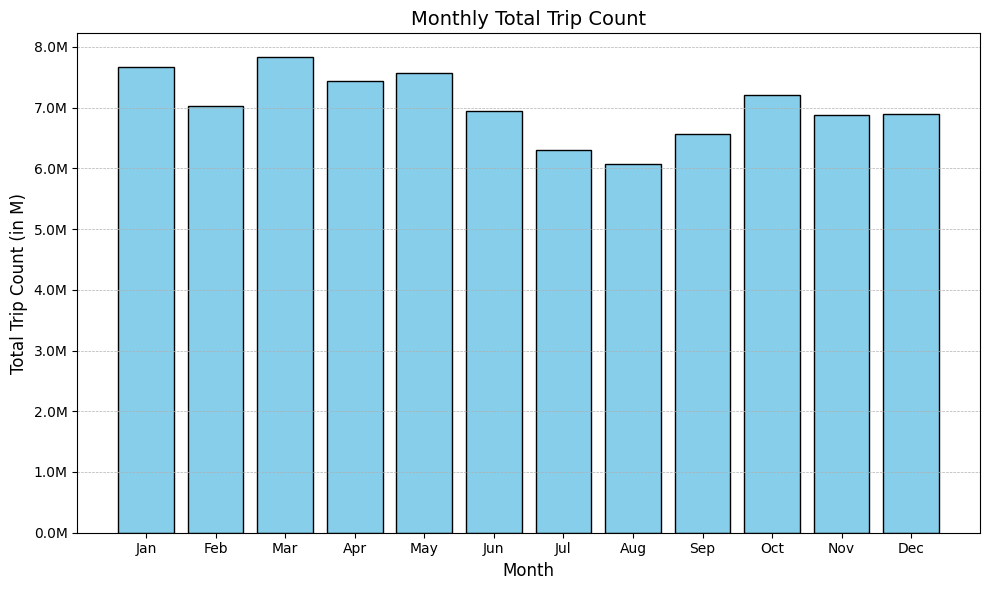

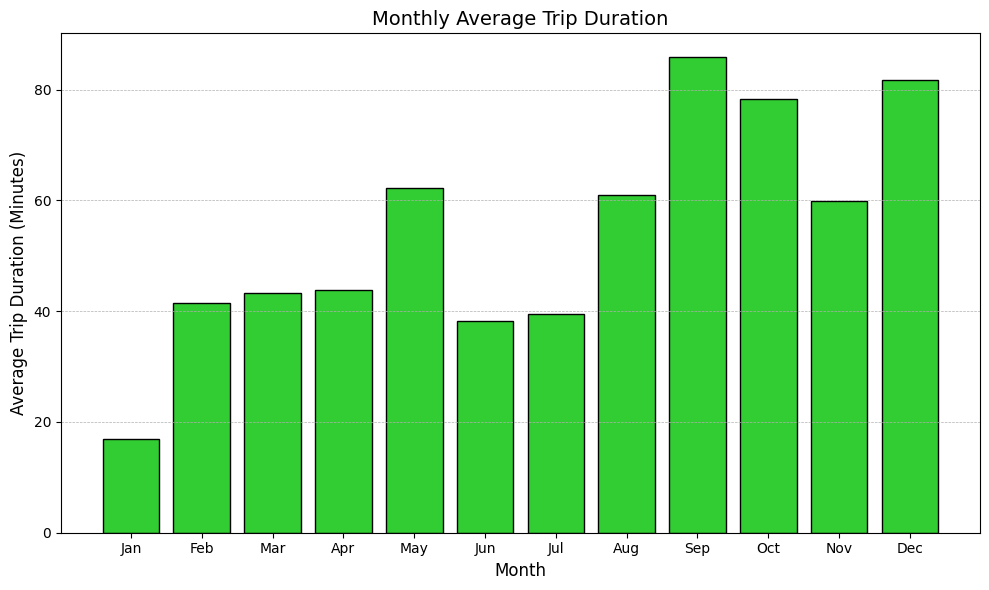

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month and group data by month
df['month'] = df['date'].dt.month
monthly_data = df.groupby('month').agg(
    total_trip=('total_trip', 'sum'),
    average_trip_time=('average_trip_time', 'mean')
).reset_index()

# Function to format y-axis ticks for trip count in 'M'
def format_m(value, tick_number):
    return f"{value / 1_000_000:.1f}M"

# Plot 1: Monthly Total Trip Count
plt.figure(figsize=(10, 6))
plt.bar(monthly_data['month'], monthly_data['total_trip'], color='skyblue', edgecolor='black')
plt.title('Monthly Total Trip Count', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Trip Count (in M)', fontsize=12)
plt.xticks(monthly_data['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Apply the custom formatter to y-axis for trip count
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_m))

plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot 2: Monthly Average Trip Duration
plt.figure(figsize=(10, 6))
plt.bar(monthly_data['month'], monthly_data['average_trip_time'], color='limegreen', edgecolor='black')
plt.title('Monthly Average Trip Duration', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Trip Duration (Minutes)', fontsize=12)
plt.xticks(monthly_data['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
